In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/H1.csv")

In [4]:
df['canceled'] = df.IsCanceled.apply(lambda x: True if x == 1 else False)

In [5]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,canceled
0,0,342,2015,July,27,1,0,0,2,0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,False
1,0,737,2015,July,27,1,0,0,2,0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,False
2,0,7,2015,July,27,1,0,1,1,0,...,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,False
3,0,13,2015,July,27,1,0,1,1,0,...,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,False
4,0,14,2015,July,27,1,0,2,2,0,...,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,False


In [6]:
df['year_week'] = df.apply(lambda row: str(row['ArrivalDateYear']) + "-" + str(row['ArrivalDateWeekNumber']), axis=1)
df['year_month'] = df.apply(lambda row: str(row['ArrivalDateYear']) + "-" + str(row['ArrivalDateMonth']), axis=1)
df['dt'] = df.apply(lambda row: str(row['ArrivalDateYear']) + "-" + str(row['ArrivalDateMonth']) + "-" + str(row['ArrivalDateDayOfMonth']), axis=1)

In [7]:
pd.DataFrame(df.groupby(['year_week'])['IsCanceled'].sum())

,IsCanceled
year_week,
2015-27,41
2015-28,48
2015-29,87
2015-30,74
2015-31,101
...,...
2017-5,51
2017-6,91
2017-7,96


In [8]:
df_tf = pd.DataFrame({"data": df.IsCanceled.values}, index=df.year_week)

In [9]:
ti = df_tf.groupby(df_tf.index).sum()

In [10]:
ti

,data
year_week,
2015-27,41
2015-28,48
2015-29,87
2015-30,74
2015-31,101
...,...
2017-5,51
2017-6,91
2017-7,96


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [12]:
result = seasonal_decompose(ti, period = 52)

In [13]:
seasonal = result.seasonal
residual = result.resid
trend = result.trend

Text(0, 0.5, 'Residual')

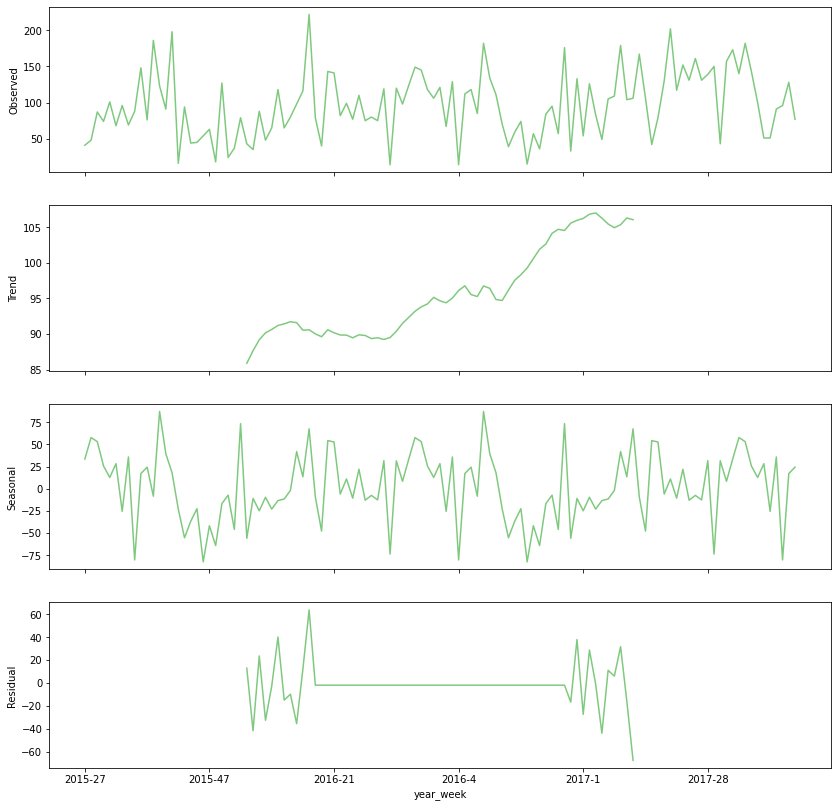

In [14]:
plt.rc("figure", figsize=(14,8))
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(14,14))
result.observed.plot(ax=axes[0], legend=False, colormap="Accent")
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False, colormap="Accent")
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False, colormap="Accent")
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False, colormap="Accent")
axes[3].set_ylabel('Residual')

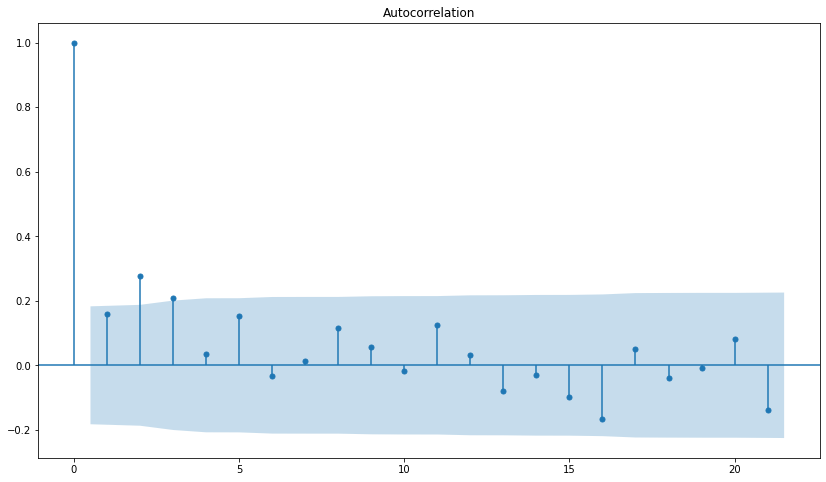

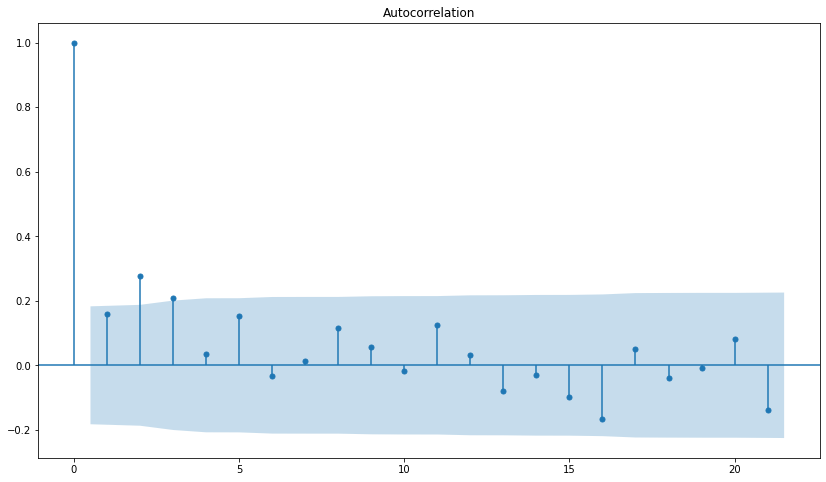

In [15]:
plot_acf(ti)

In [20]:
from statsmodels.tsa.stattools import acf, pacf

In [17]:
data_acf = acf(ti, nlags=100)

/Users/z001hqv/.pyenv/versions/3.8.1/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [18]:
data_acf[:5]

array([1.        , 0.1591609 , 0.27683086, 0.20977546, 0.03483783])

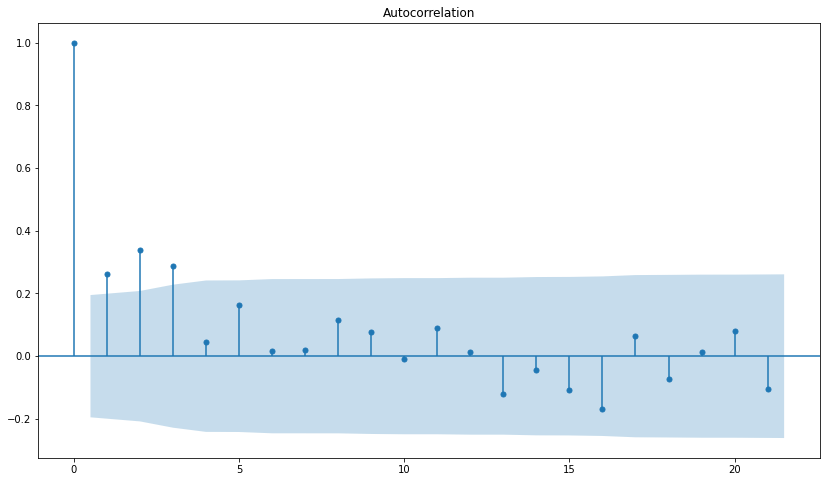

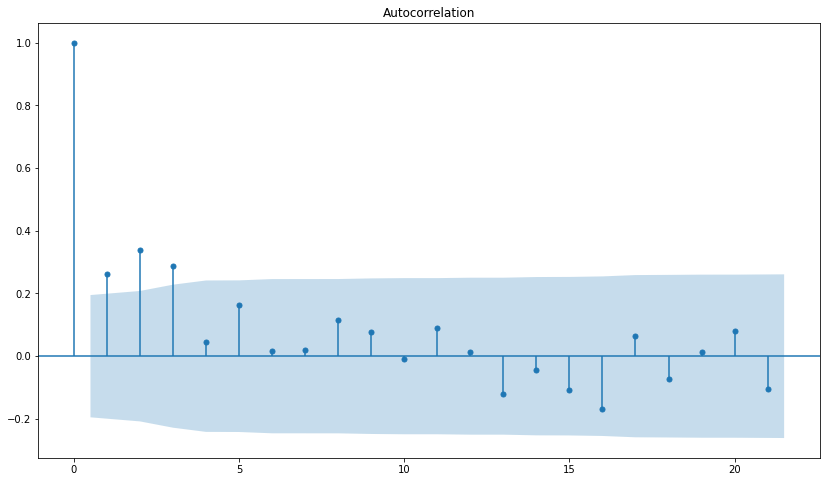

In [19]:
plot_acf(data_acf)

In [22]:
data_pacf = pacf(ti, nlags=50)

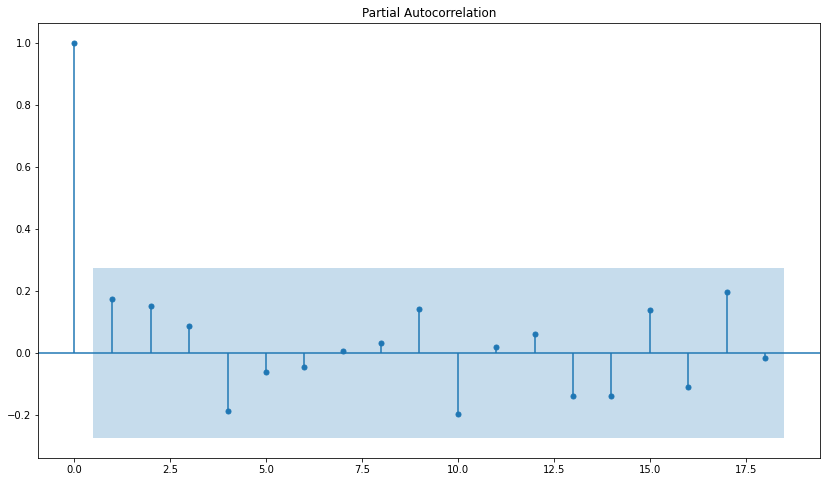

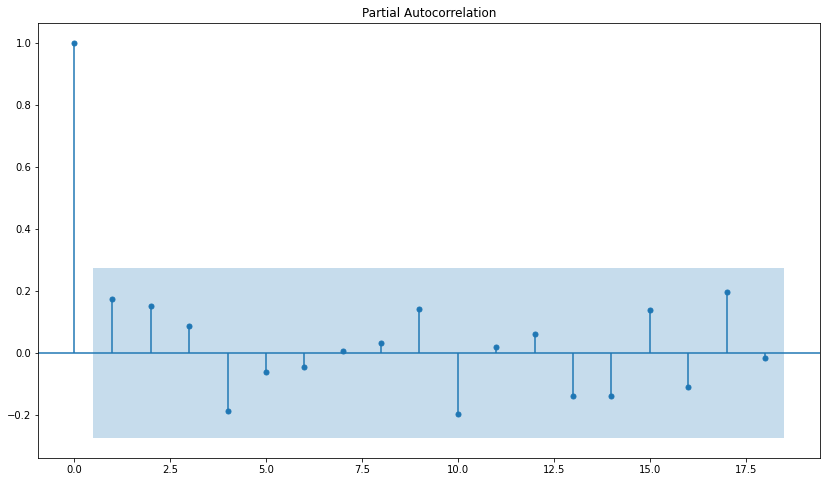

In [24]:
plot_pacf(data_pacf)

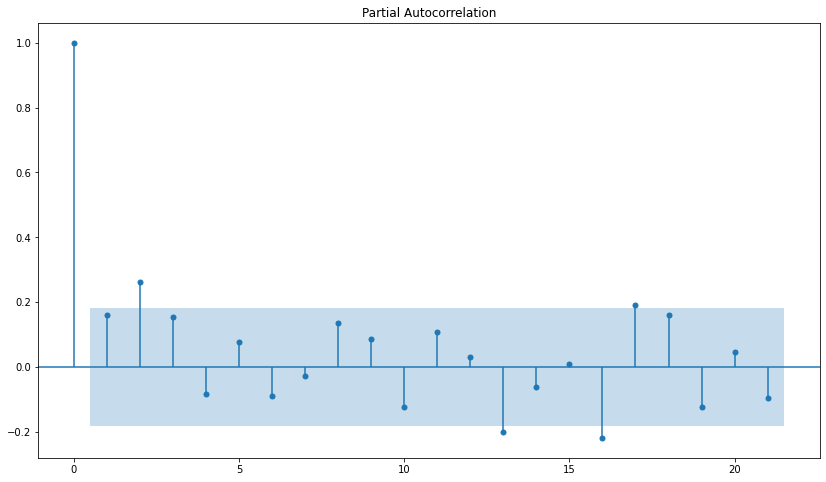

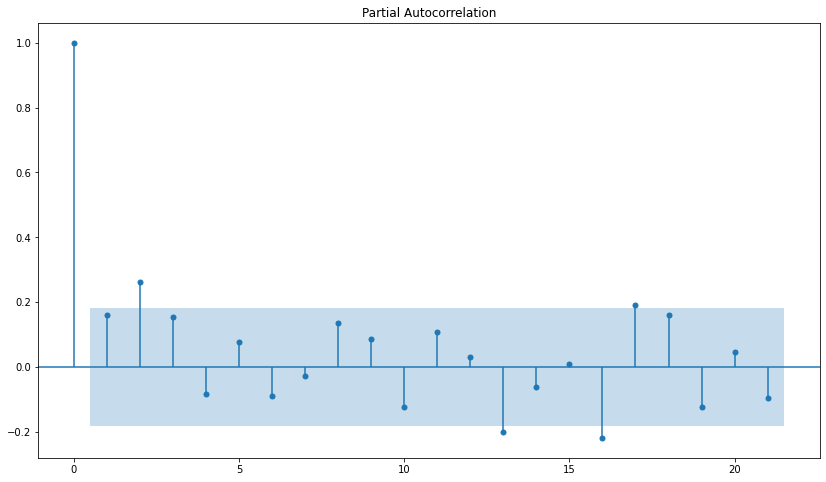

In [25]:
plot_pacf(ti)

In [26]:
ti_ma = ti

In [31]:
ti_ma["sma4"] = ti_ma.data.rolling(4).mean()

In [32]:
ti_ma

,data,sma4
year_week,,
2015-27,41,NaN
2015-28,48,NaN
2015-29,87,NaN
2015-30,74,62.50
2015-31,101,77.50
...,...,...
2017-5,51,86.25
2017-6,91,73.25
2017-7,96,72.25


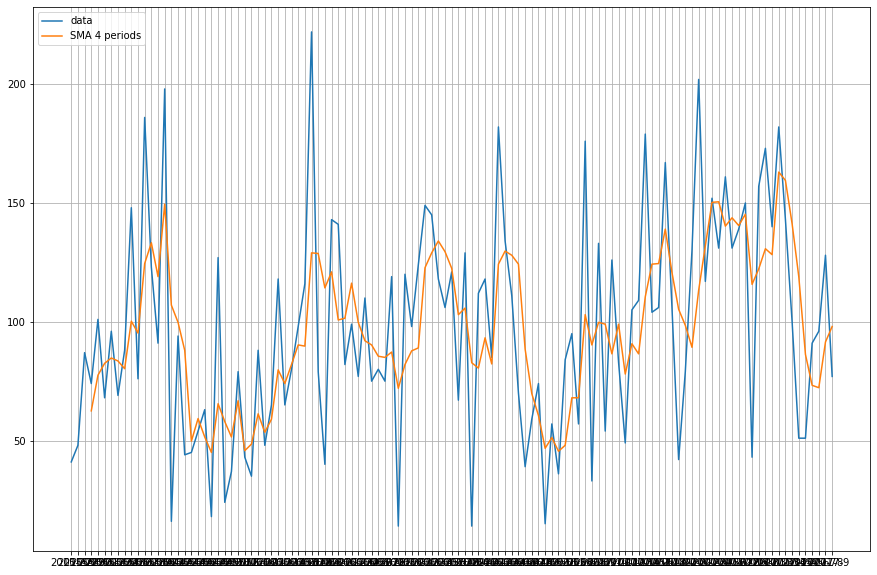

In [33]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(ti_ma['data'],label='data')
plt.plot(ti_ma['sma4'],label='SMA 4 periods')
plt.legend(loc=2)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop(columns=['IsCanceled'])

In [36]:
y = df['IsCanceled']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [44]:
len(X_train)

36054

In [45]:
len(X_test)

4006

In [46]:
len(y_train)

36054

In [47]:
len(y_test)

4006